<a href="https://colab.research.google.com/github/avetodef/modern-data-analysis-tools-itmo/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_1_%D0%A4%D0%B5%D0%B4%D0%BE%D1%82%D1%8C%D0%B5%D0%B2%D0%B0_%D0%A1%D0%98%D0%90%D0%944_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Федотьева Софья СИАД 4.1 R32423

# Задание 1 (numpy + matplotlib)

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить "матричным" способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

def check_row(row):
  if (len(row)!= 3 ):
    print("not enough arguments!")
    return 0
  if (row[0]==0 and row[1] == 0):
    print("enter an actual equation")
    return 0
  return 1  

def get_matrixes(row1, row2):
  try:
    A = np.array([[float(row1[0]), float(row1[1])], 
                  [float(row2[0]), float(row2[1])]])
    
    B = np.array([float(row1[2]), float(row2[2])])

  except ValueError:
    print("not a number is entered")
  A.shape
  B.shape
  return A,B

def get_solution(A, B):
  detA = np.linalg.det(A)
  rank = np.linalg.matrix_rank(A)
  if (rank<2):
    solution_count = "inf"
    return [0],solution_count
  if (detA == 0):
    solution_count = 0
    return [0], 0
  else:
    invA = np.linalg.inv(A)
    solution_count = 1
    return np.matmul(invA, B), solution_count

In [116]:
def draw_nothing():
  x = np.linspace(-10, 10, 100)

def draw_equation(a1, a2, b, x, label, c, style):
  if (a1!= 0 and a2!= 0):
    y = (b - a1*x)/a2
    plt.plot(x, y,color = c, label = label, linestyle = style)
  elif(a1 == 0):
    y = b/a2
    plt.axhline(y,color = c, label= label, linestyle = style)
  else:
    plt.axvline(b/a1,color = c, label= label, linestyle = style)
  
def draw_graph(A, B, solution_count, solution):

  if (solution_count == 0):
      draw_nothing()
      print("no solution")
      exit()
  else:
    if (len(solution) == 2):
      print("solution:", solution)
      x = np.linspace(solution[0]-10,solution[1]+10,100)
      plt.scatter(solution[0], solution[1], color = "#ff0000")
      style1 = "solid"
    else:
      print ("infinite number of solutions")
      x = np.linspace(-100, 100, 100)
      style1 = "--"
    style2 = "solid"

    draw_equation(A[0][0],A[0][1], B[0],x,"first equation", "#ff9900", style2)
    draw_equation(A[1][0],A[1][1], B[1], x, "second equation", "#00c8ff", style1 )

    
  plt.legend()
  
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')


  plt.grid()
  plt.show()

In [118]:
row1 = input("enter 3 coefficients for the first equation: ").split()
row2 = input("enter 3 coefficients for the second equation: ").split()

enter 3 coefficients for the first equation: 10 62 42
enter 3 coefficients for the second equation: 0 63 9


solution: [3.31428571 0.14285714]


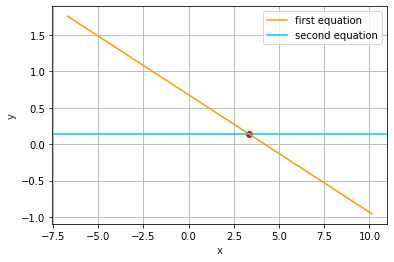

In [119]:
if (check_row(row1)==1 and check_row(row2) == 1):
  A, B = get_matrixes(row1, row2)
  solution, solution_count = get_solution(A, B)
  draw_graph(A, B, solution_count, solution)
  

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

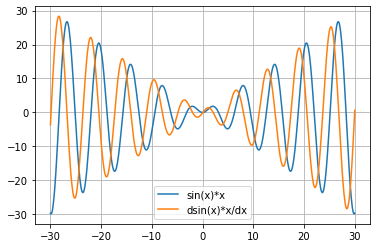

In [61]:
import torch

x = torch.linspace(-30, 30, 600)
y = torch.sin(x)*x

der = list()

i = -30.0
step = 0.1

while i<=30.0:
  xi = torch.tensor(i, requires_grad=True)
  yi = torch.sin(xi)*xi
  yi.backward()
  der.append(xi.grad)
  i+=step

plt.plot(x,y, label = "sin(x)*x")
plt.plot(x, der, label = "dsin(x)*x/dx")
plt.grid()
plt.legend()
plt.show()